In [ ]:
from figures import get_cmap, apply_colormap_to_img, label_image_by_ratio

from matplotlib import pyplot as plt
import numpy as np
import harpy
import spatialdata as sd
from microfilm import microplot

/Users/benjaminr/Documents/GitHub/harpy_figures/.venv/lib/python3.12/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
2025-06-16 21:35:18,882 - harpy.image._tiling - WARNING - 'jax' or 'basicpy' not installed, to use 'harpy.im.tiling_correction', please install these libraries.
/Users/benjaminr/Documents/GitHub/harpy_figures/.venv/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/Users/benjaminr/Documents/GitHub/harpy_figures/.venv/lib/python3.12/site-packages/anndata/utils.py:434: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.

In [2]:
plt.rcParams['figure.dpi'] = 300

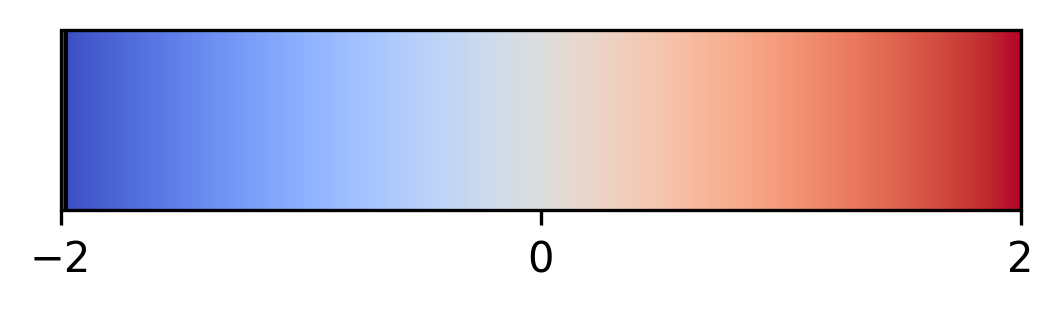

In [3]:
cmap = get_cmap()
a = np.array([[-2, 2]])
pl.figure(figsize=(4, 1))
img = pl.imshow(a, cmap=cmap)
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.8, 0.6])
pl.colorbar(orientation="horizontal", cax=cax, ticks=[-2, 0, 2],)
pl.savefig("colorbar.pdf")

In [4]:
def copy_labels(arr):
    # if 4 dimesions, return the last three and squeeze
    if arr.ndim > 2:
        arr = arr.squeeze()
    return arr

In [5]:
full_sdata = harpy.datasets.pixie_example()
full_sdata

/Users/benjaminr/.cache/huggingface/datasets/downloads/extracted/f7a07c6ab6491f45a667707cf16be9a057691dd4bb848cfb4640cfb699b85d95/post_clustering


2025-06-16 21:35:28,542 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov0'
2025-06-16 21:35:28,551 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov0'
2025-06-16 21:35:28,559 - harpy.image._manager - INFO - Writing results to layer 'label_whole_fov0'
2025-06-16 21:35:28,710 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov1'
2025-06-16 21:35:28,720 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov1'
2025-06-16 21:35:28,729 - harpy.image._manager - INFO - Writing results to layer 'label_whole_fov1'
2025-06-16 21:35:28,879 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov2'
2025-06-16 21:35:28,892 - harpy.image._manager - INFO - Writing results to layer 'label_nuclear_fov2'
2025-06-16 21:35:28,902 - harpy.image._manager - INFO - Writing results to layer 'label_whole_fov2'
2025-06-16 21:35:29,036 - harpy.image._manager - INFO - Writing results to layer 'raw_image_fov3'
20

SpatialData object
├── Images
│     ├── 'raw_image_fov0': DataArray[cyx] (22, 512, 512)
│     ├── 'raw_image_fov1': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov2': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov3': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov4': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov5': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov6': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov7': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov8': DataArray[cyx] (22, 1024, 1024)
│     ├── 'raw_image_fov9': DataArray[cyx] (22, 1024, 1024)
│     └── 'raw_image_fov10': DataArray[cyx] (22, 1024, 1024)
├── Labels
│     ├── 'label_nuclear_fov0': DataArray[yx] (512, 512)
│     ├── 'label_nuclear_fov1': DataArray[yx] (1024, 1024)
│     ├── 'label_nuclear_fov2': DataArray[yx] (1024, 1024)
│     ├── 'label_nuclear_fov3': DataArray[yx] (1024, 1024)
│     ├── 'label_nuclear_fov4': DataArray[yx] (1024, 1024)
│     ├

In [6]:
sdata = sd.SpatialData()
c_subset = ['H3K27me3', 'CD45']
sdata['cells'] = sd.models.Image2DModel.parse(
    full_sdata['raw_image_fov0'].sel(c=c_subset), c_coords=c_subset
)
sdata['labels'] = full_sdata['label_whole_fov0'].copy()
sdata

SpatialData object
├── Images
│     └── 'cells': DataArray[cyx] (2, 512, 512)
└── Labels
      └── 'labels': DataArray[yx] (512, 512)
with coordinate systems:
    ▸ 'fov0', with elements:
        cells (Images), labels (Labels)

In [7]:
img = sdata["cells"].chunk(212).copy()
img

<xarray.DataArray 'image' (c: 2, y: 512, x: 512)> Size: 2MB
dask.array<rechunk-merge, shape=(2, 512, 512), dtype=float32, chunksize=(2, 212, 212), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) <U8 64B 'H3K27me3' 'CD45'
  * y        (y) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 508.5 509.5 510.5 511.5
  * x        (x) float64 4kB 0.5 1.5 2.5 3.5 4.5 ... 508.5 509.5 510.5 511.5
Attributes:
    transform:  {'fov0': Identity }

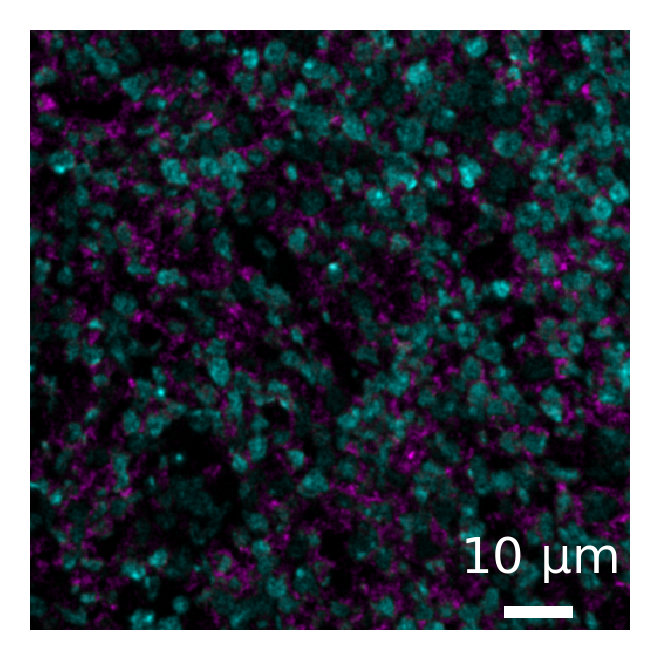

In [8]:
microim = microplot.microshow(images=img, unit='um', scalebar_unit_per_pix=0.17, scalebar_size_in_units=10, dpi=300, fig_scaling=2)

In [9]:
disp_img = label_image_by_ratio(full_sdata['label_whole_fov0'].data.compute(), full_sdata['label_whole_fov0'].data.compute(), threshold=2) 
disp_img_final = apply_colormap_to_img(disp_img)

(-0.5, 511.5, 511.5, -0.5)

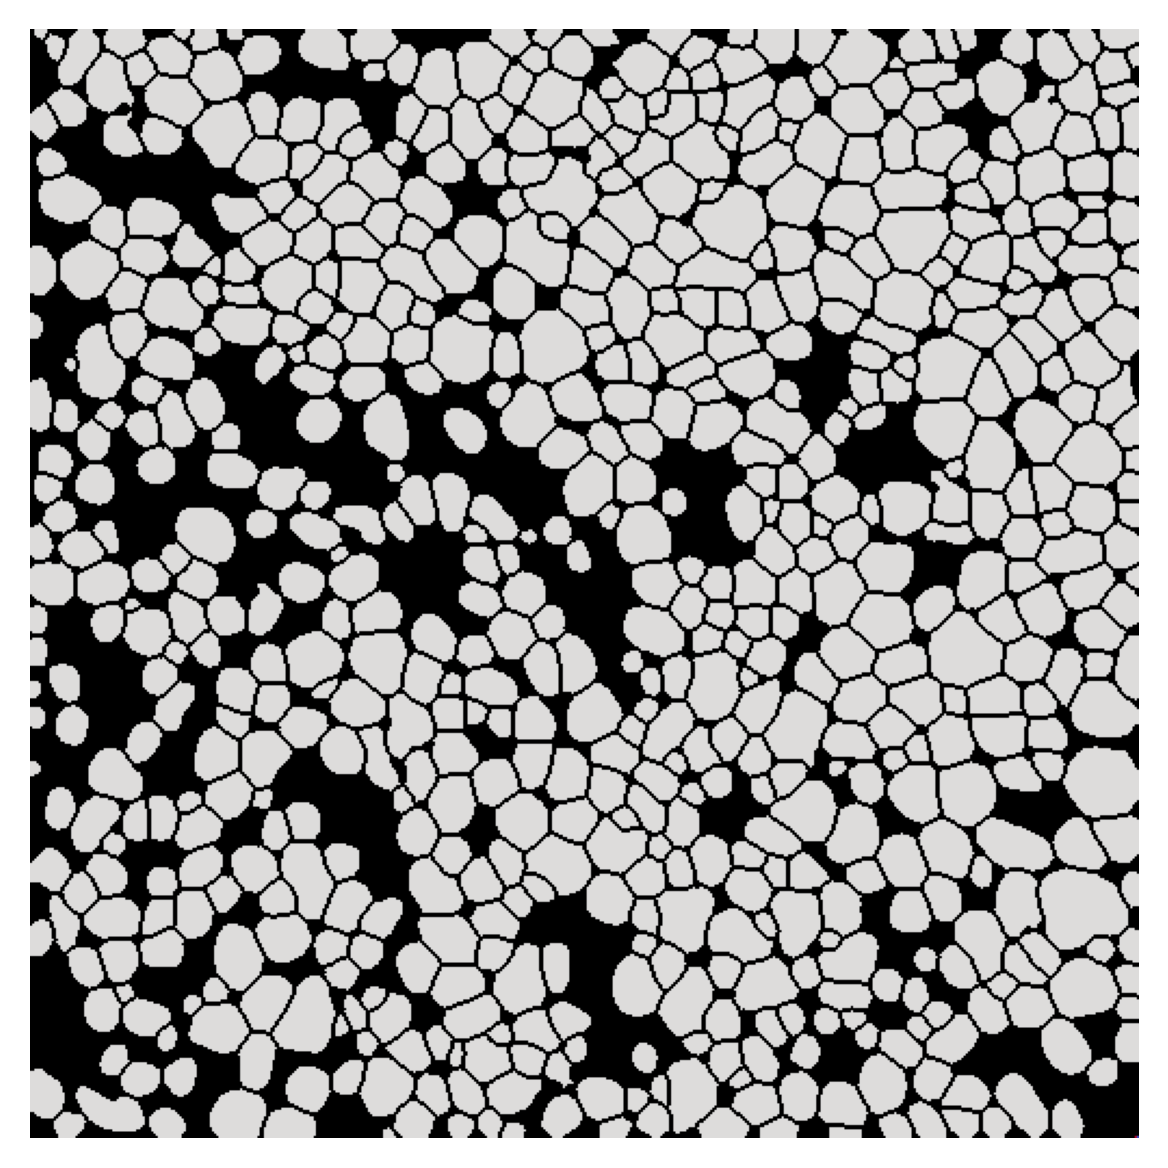

In [10]:
plt.imshow(disp_img_final)
plt.axis('off')

## Examples without segmentation model

(-0.5, 511.5, 511.5, -0.5)

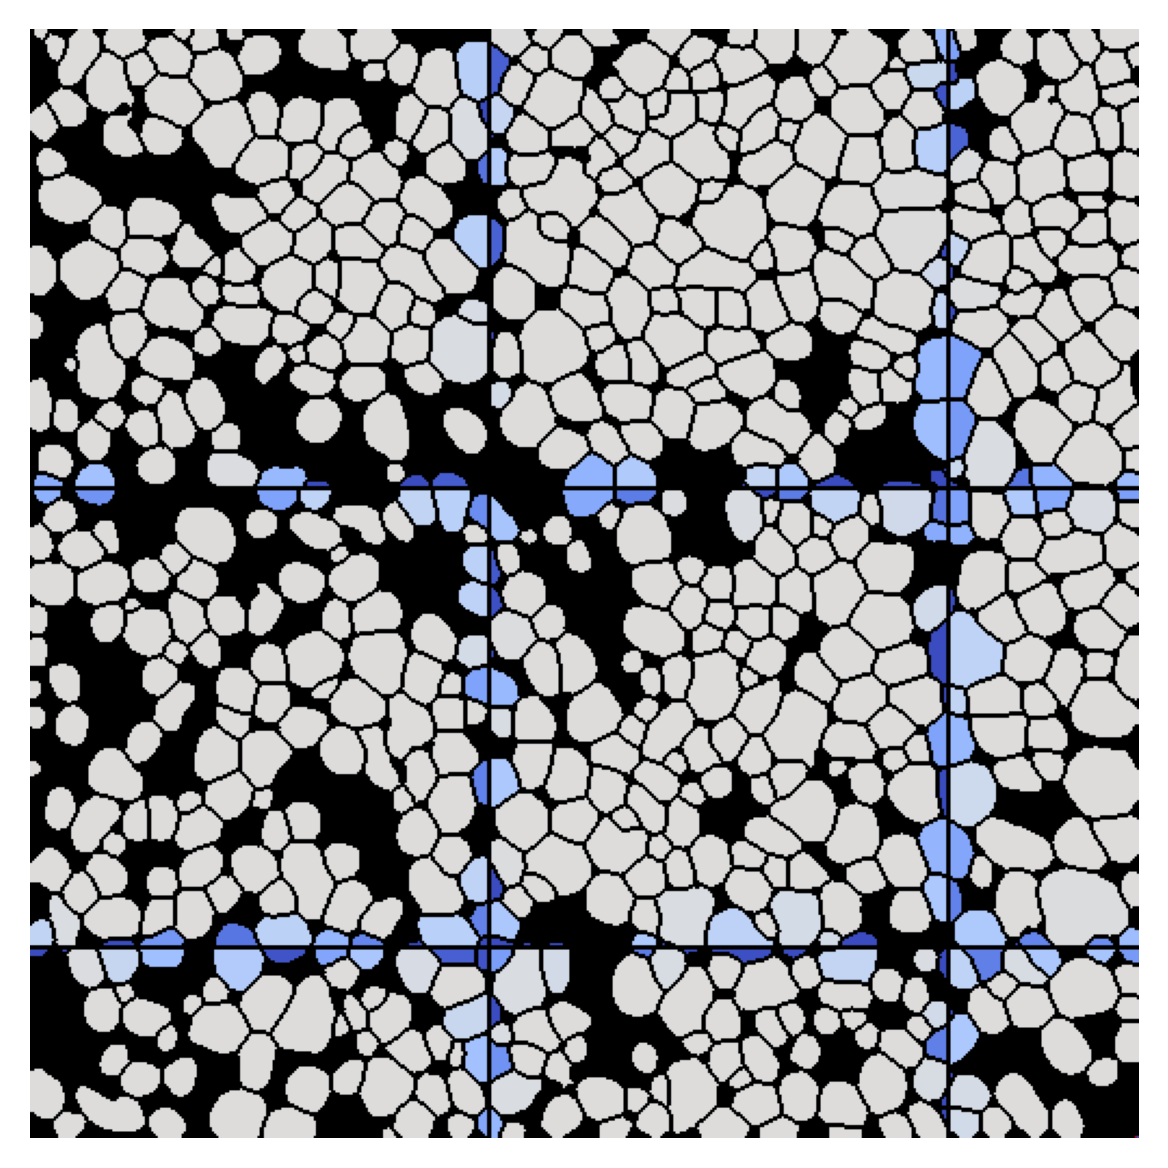

In [11]:
labels = full_sdata['label_whole_fov0'].copy()

results = sd.map_raster(labels.chunk(212), func=copy_labels, blockwise=True, depth=10, relabel=True)
img_dask_label = results.data.compute()
disp_img = label_image_by_ratio(full_sdata['label_whole_fov0'].data.compute(), img_dask_label, threshold=2) 
disp_img_final = apply_colormap_to_img(disp_img)
plt.imshow(disp_img_final)
# turn off axes
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

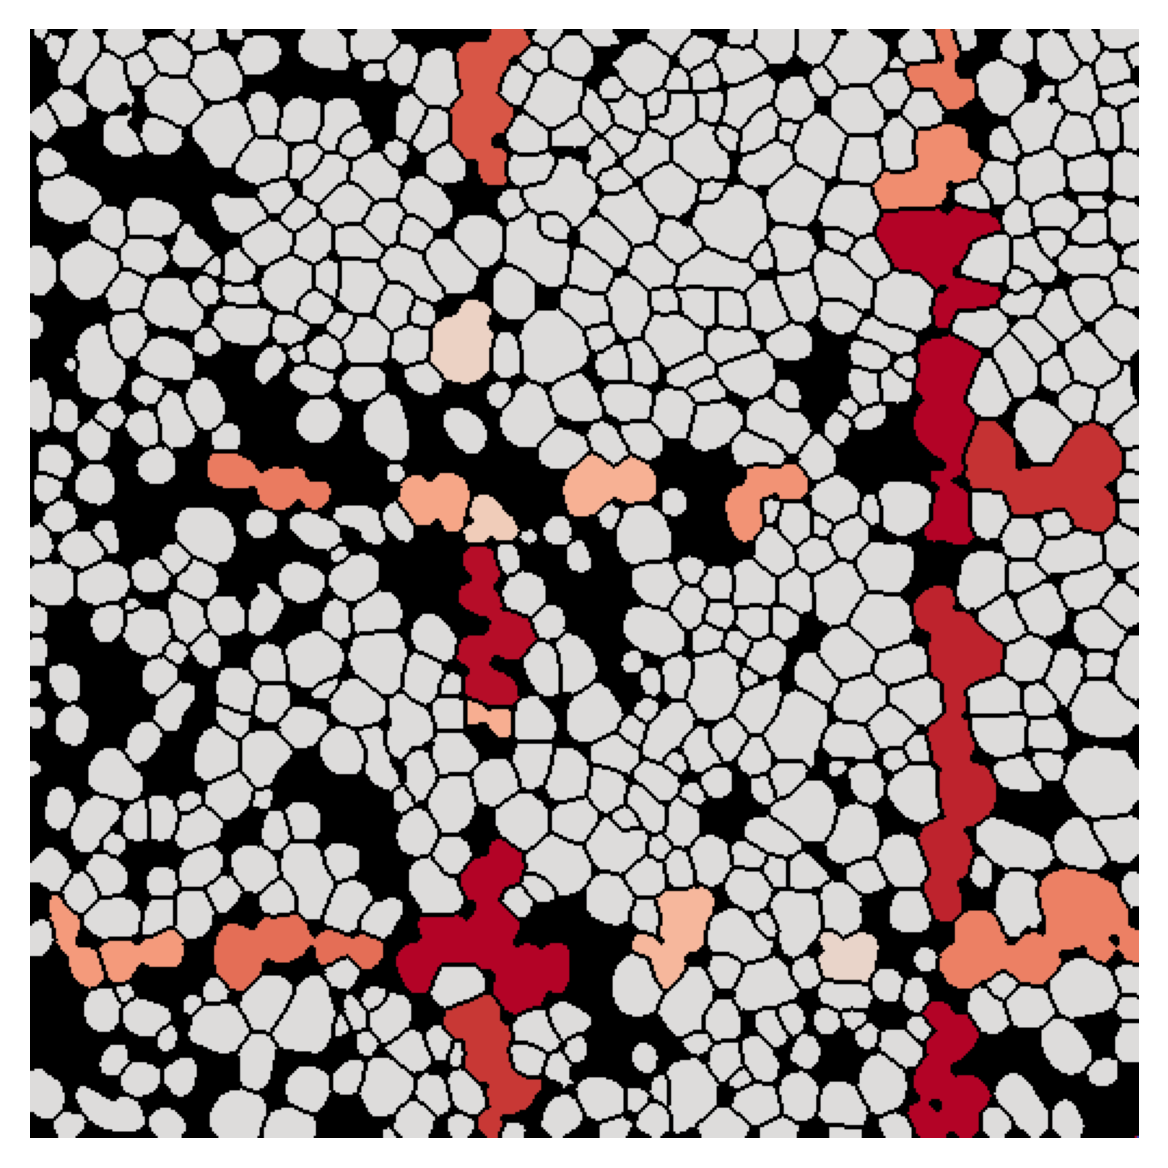

In [12]:
import squidpy

labels = full_sdata['label_whole_fov0'].copy()

ic = squidpy.im.ImageContainer(labels)
ic

result = squidpy.im.segment(
    img=ic,
    layer='image',
    method=copy_labels,
    chunks=212,
    copy=True,
)

disp_img = label_image_by_ratio(labels.data.compute(), result['segmented_custom'].squeeze().data, threshold=2) 
disp_img_final = apply_colormap_to_img(disp_img)
plt.imshow(disp_img_final)
# turn off axes
plt.axis('off')

## Cellpose example with correct merging

2025-06-16 21:35:48,617 - harpy.image.segmentation._segmentation - INFO - Linking labels across chunks.
2025-06-16 21:35:48,649 - harpy.image._manager - INFO - Writing results to layer 'masks_no_cleanup'


(-0.5, 511.5, 511.5, -0.5)

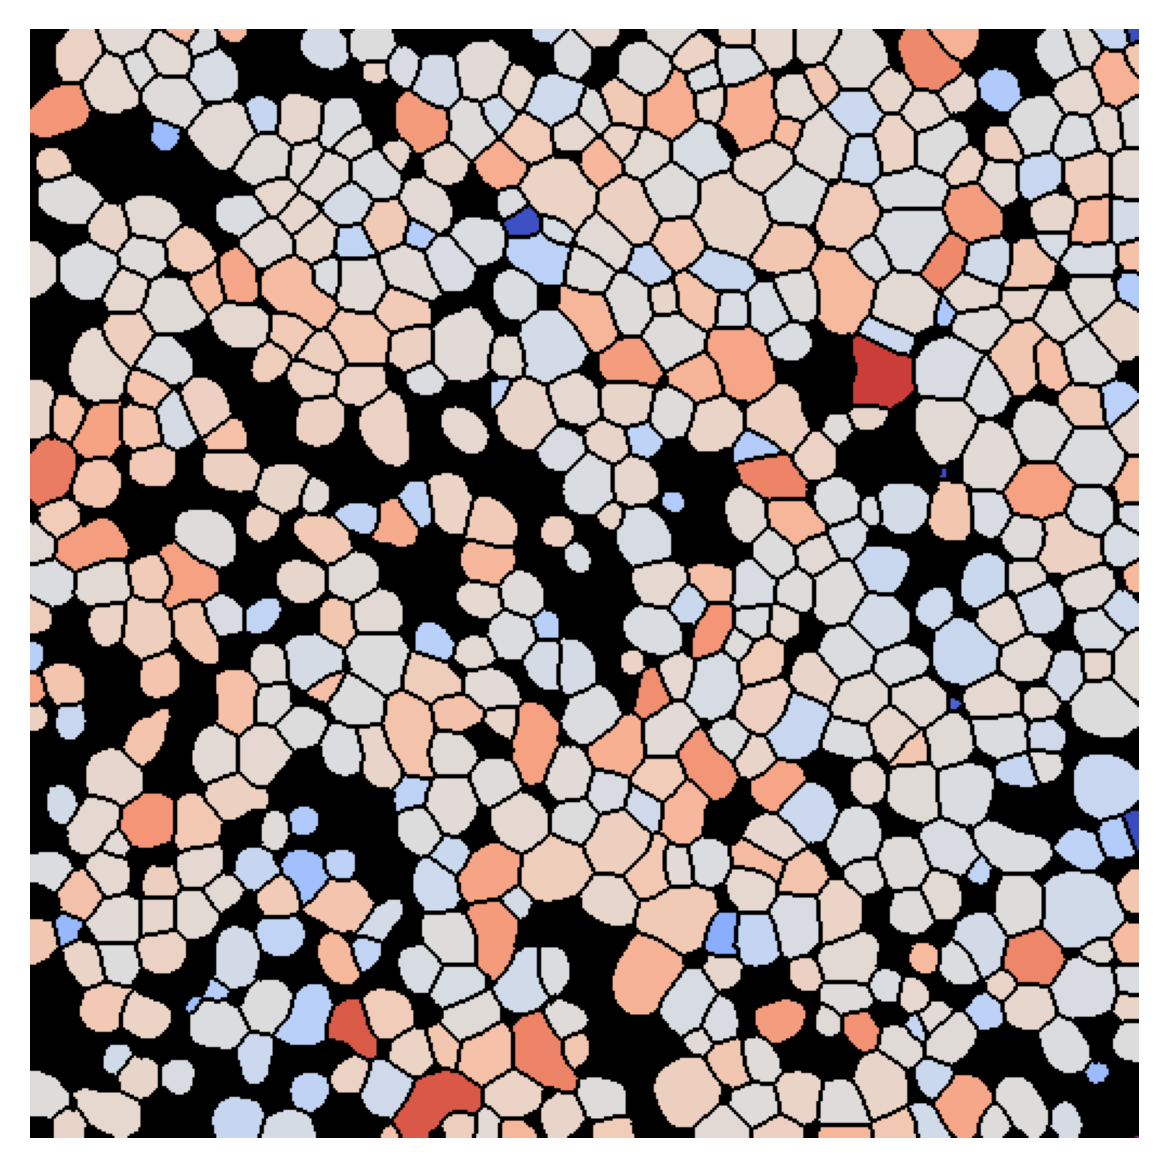

In [13]:
model = harpy.im.cellpose_callable
labels_layer = "masks_no_cleanup"
if labels_layer in sdata:
    del sdata[labels_layer]
sdata = harpy.im.segment(
    sdata,
    img_layer="cells",
    model=model,
    device="cpu",
    model_type="cyto3",
    output_labels_layer=labels_layer,
    output_shapes_layer=None,
    overwrite=True,
    trim=False,
    chunks=212,
    depth=50,
    channels=[2,1],
    diameter=30,
    min_size = 10,
    cellprob_threshold = 0,
    flow_threshold = 0.6,
)
result = sdata[labels_layer].data.compute()
labels = sdata['labels'].data.compute()
disp_img = label_image_by_ratio(labels, result, threshold=2) 
disp_img_final = apply_colormap_to_img(disp_img)
plt.imshow(disp_img_final)
# turn off axes
plt.axis('off')

## Cellpose example with incorrect merging

2025-06-16 21:35:56,663 - harpy.image.segmentation._segmentation - INFO - Linking labels across chunks.
2025-06-16 21:35:56,687 - harpy.image._manager - INFO - Writing results to layer 'masks_no_cleanup'


(-0.5, 511.5, 511.5, -0.5)

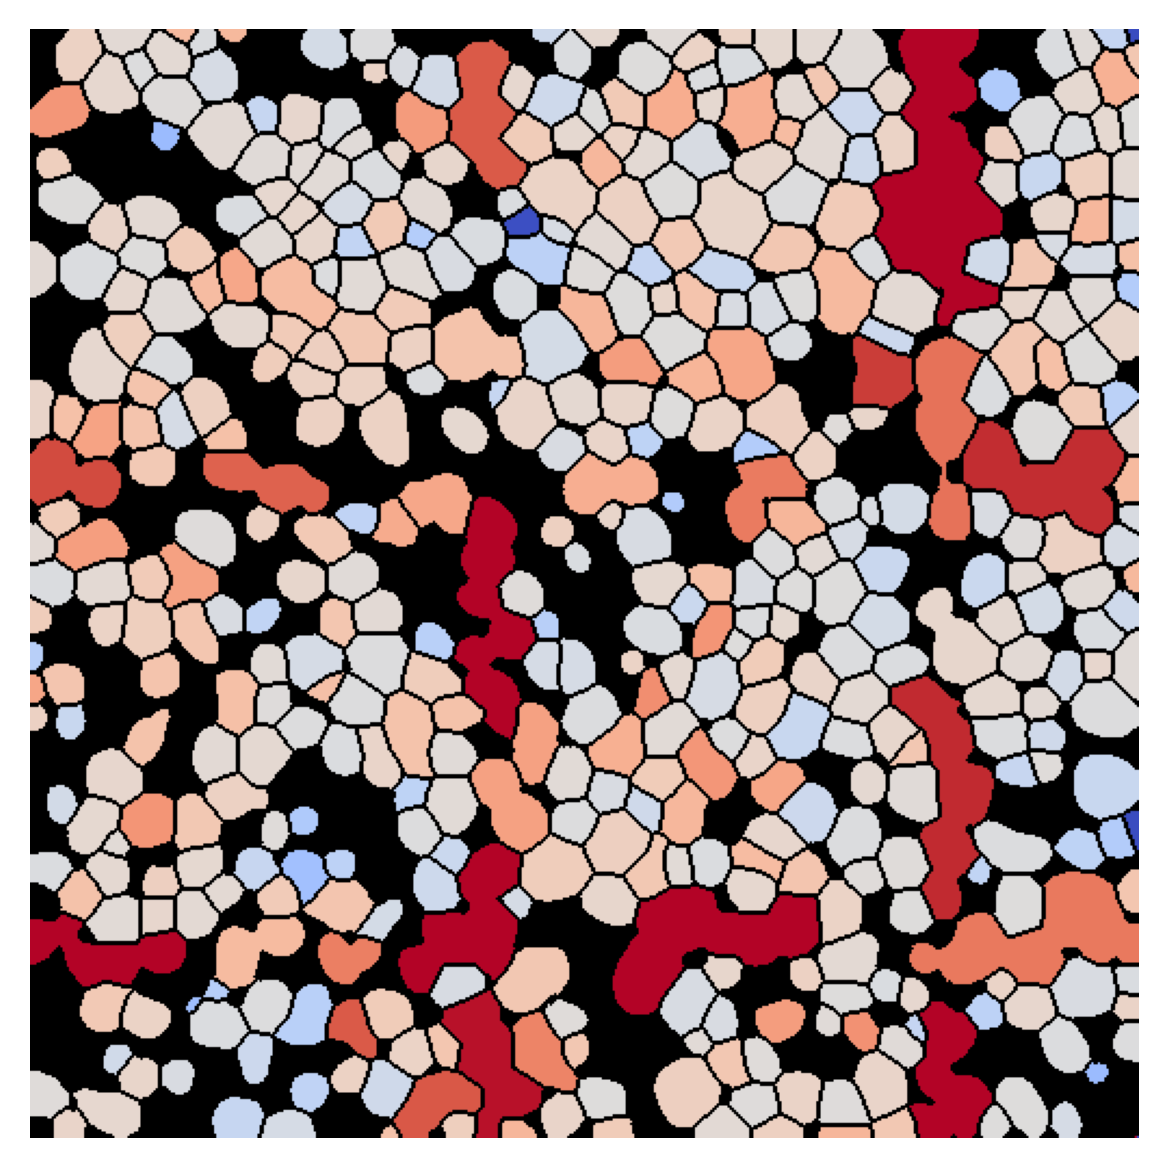

In [14]:
model = harpy.im.cellpose_callable
labels_layer = "masks_no_cleanup"
if labels_layer in sdata:
    del sdata[labels_layer]
sdata = harpy.im.segment(
    sdata,
    img_layer="cells",
    model=model,
    device="cpu",
    model_type="cyto3",
    output_labels_layer=labels_layer,
    output_shapes_layer=None,
    overwrite=True,
    trim=True,
    chunks=212,
    depth=50,
    channels=[2,1],
    diameter=30,
    min_size = 10,
    cellprob_threshold = 0,
    flow_threshold = 0.6,
)
result = sdata[labels_layer].data.compute()
labels = sdata['labels'].data.compute()
disp_img = label_image_by_ratio(labels, result, threshold=2) 
disp_img_final = apply_colormap_to_img(disp_img)
plt.imshow(disp_img_final)
# turn off axes
plt.axis('off')